<a href="https://colab.research.google.com/github/zhar121/disseration-team-rep/blob/main/data_investigation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Load data, drop duplicated raws**

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import pairwise_distances
from scipy.stats import entropy
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

# Investigate df with all candidates

In [2]:
!gdown 1LutPm5fL0vUQ88xRViRRJaY2aNr8RFCX

Downloading...
From: https://drive.google.com/uc?id=1LutPm5fL0vUQ88xRViRRJaY2aNr8RFCX
To: /content/final_df_all_candidates.csv
100% 19.9M/19.9M [00:00<00:00, 39.8MB/s]


In [3]:
df_all = pd.read_csv('final_df_all_candidates.csv')

In [4]:
#check datatype and missimg values
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71699 entries, 0 to 71698
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   paperId                 71699 non-null  object 
 1   questionId              71699 non-null  object 
 2   candidateId             71699 non-null  object 
 3   answerSheetId           71699 non-null  object 
 4   answer_score            71699 non-null  float64
 5   maxScore                71699 non-null  int64  
 6   answeredCorrectly       71699 non-null  int64  
 7   Difficulty              71699 non-null  float64
 8   firstSeenAt             71699 non-null  object 
 9   lastAnsweredAt          71699 non-null  object 
 10  ResponseTime            71699 non-null  float64
 11  Expected response time  71699 non-null  float64
 12  SequenceOrder           71699 non-null  float64
 13  TotalTestingTime        71699 non-null  float64
 14  IpAddress               38708 non-null

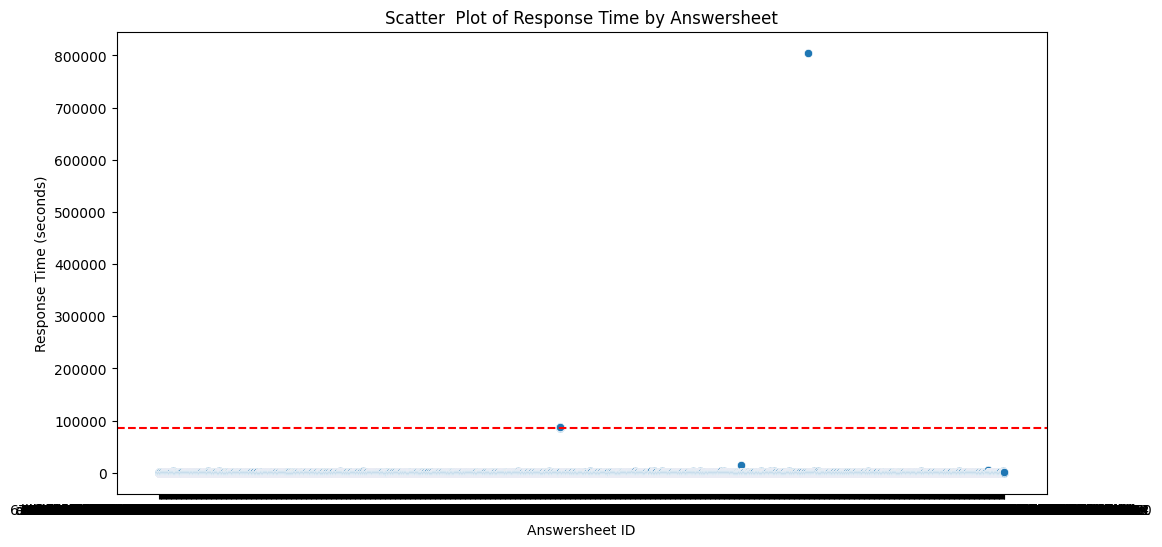

In [5]:
#Scatterplot of ResponseTime by answersheetid
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='answerSheetId', y='ResponseTime', data=df_all)
plt.title('Scatter  Plot of Response Time by Answersheet')
plt.xlabel('Answersheet ID')
plt.ylabel('Response Time (seconds)')
#plot 99 percentile
plt.axhline(df_all['ResponseTime'].quantile(0.999), color='r', linestyle='--')
plt.show()


In [6]:
# get candidateIds which Response Time are out of 999 quantile by ResponseTime
candidate_ids_out_of_99_quantile = df_all[df_all['ResponseTime'] > df_all['ResponseTime'].quantile(0.999)]['candidateId'].unique()
print(candidate_ids_out_of_99_quantile)

['772f07ff-c8c8-4ec1-8173-e320b66847df'
 'c1d503c4-520b-4380-91ed-d286a5592381']


In [18]:
# drop candidate_ids_out_of_99_quantile from df_all
df_all_new = df_all[~df_all['candidateId'].isin(candidate_ids_out_of_99_quantile)]

In [8]:
print(df_all_new[['ResponseTime', 'TotalTestingTime', 'ExamScore']].describe())
# Access and describe multiple columns directly from the DataFrame.

       ResponseTime  TotalTestingTime     ExamScore
count  71518.000000      71518.000000  71518.000000
mean     133.807741       6785.856471     84.953830
std      270.054836       1813.791812     21.249738
min        0.043000         58.652000      0.000000
25%       17.619250       5848.810000     75.000000
50%       40.769500       6918.752000     88.000000
75%      127.863000       7927.173000     99.000000
max    15045.365000      15439.407000    126.000000


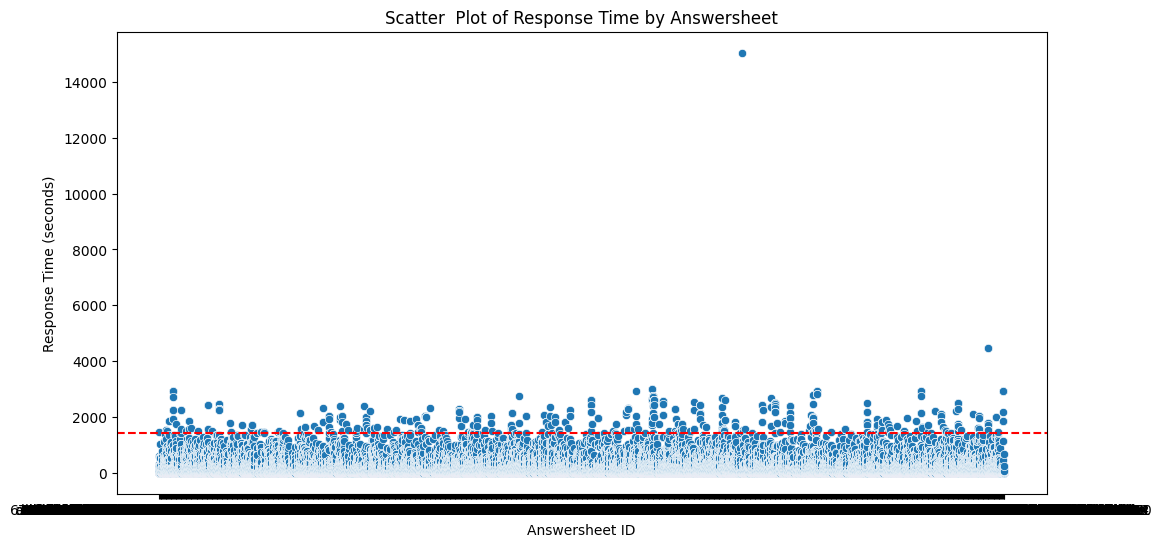

In [11]:
#Scatterplot of ResponseTime by answersheetid
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='answerSheetId', y='ResponseTime', data=df_all_new)
plt.title('Scatter  Plot of Response Time by Answersheet')
plt.xlabel('Answersheet ID')
plt.ylabel('Response Time (seconds)')
#plot 99 percentile
plt.axhline(df_all['ResponseTime'].quantile(0.99), color='r', linestyle='--')
plt.show()

In [13]:
# get candidateId which Response Time is higher than 14000
candidate_ids_more_than_14000 = df_all_new[df_all_new['ResponseTime'] > 14000]['candidateId'].unique()
print(candidate_ids_more_than_14000)

['b1cbc3cf-1d6f-4973-a654-5c3c420bf222']


In [19]:
#from df_all remove candidateId b1cbc3cf-1d6f-4973-a654-5c3c420bf222
df_all_new = df_all_new[~df_all_new['candidateId'].isin(candidate_ids_more_than_14000)]

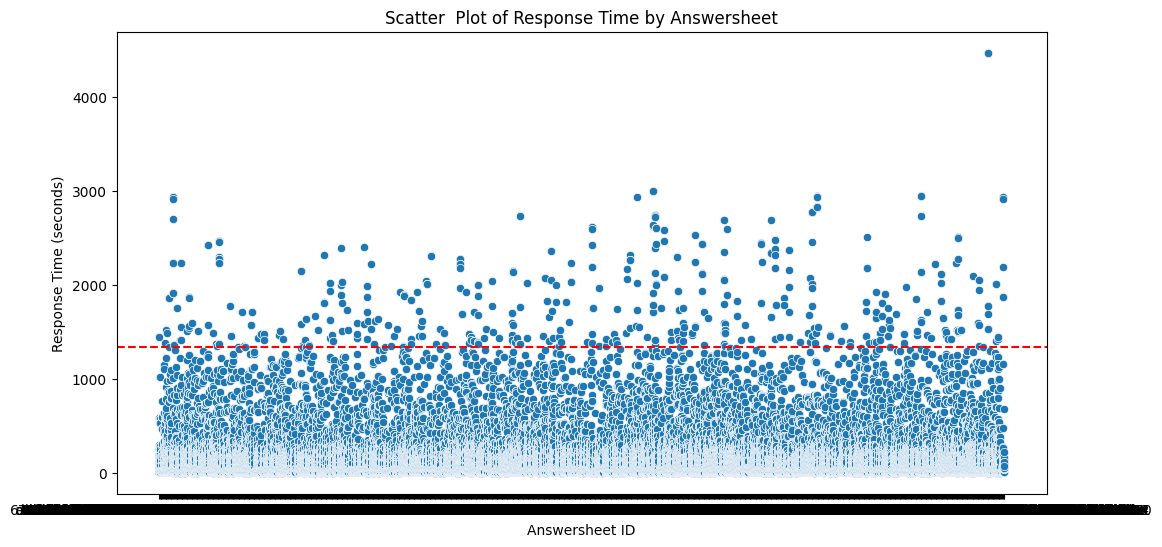

In [20]:
#Scatterplot of ResponseTime by answersheetid

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.scatterplot(x='answerSheetId', y='ResponseTime', data=df_all_new)
plt.title('Scatter  Plot of Response Time by Answersheet')
plt.xlabel('Answersheet ID')
plt.ylabel('Response Time (seconds)')
#plot 99 percentile
plt.axhline(df_all_new['ResponseTime'].quantile(0.99), color='r', linestyle='--')
plt.show()


In [23]:
print(df_all_new[['ResponseTime', 'TotalTestingTime', 'ExamScore']].describe())
# Access and describe multiple columns directly from the DataFrame.

       ResponseTime  TotalTestingTime     ExamScore
count  71411.000000      71411.000000  71411.000000
mean     133.507050       6785.289410     84.973912
std      264.025898       1810.789058     21.217798
min        0.043000         58.652000      0.000000
25%       17.609000       5848.810000     75.000000
50%       40.756000       6915.373000     87.000000
75%      127.860500       7927.173000     99.000000
max     4468.680000      13194.468000    126.000000
